<a href="https://colab.research.google.com/github/IngoTB303/DataLit/blob/master/Homework_Assignment_(Analyzing_Distributions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment (Analyzing Distributions)
**Part 1:**

* Follow the “Histograms and Density Plots in Python” tutorial to figure out which airline is most likely to get you to your destination on time.
* Download the data file (formatted_flights.csv) here
* Tell us which airline you choose and why.

In [211]:
#snippet to upload formatted_flights.csv - this will take a while
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [213]:
import pandas as pd
# Read in data and examine first 10 rows
flights = pd.read_csv('formatted_flights.csv')

# checking content
flights.head(5)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


In [0]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
# Generate list of unique airlines to plot
airlines = flights.name.unique().tolist()

Text(0, 0.5, 'Density')

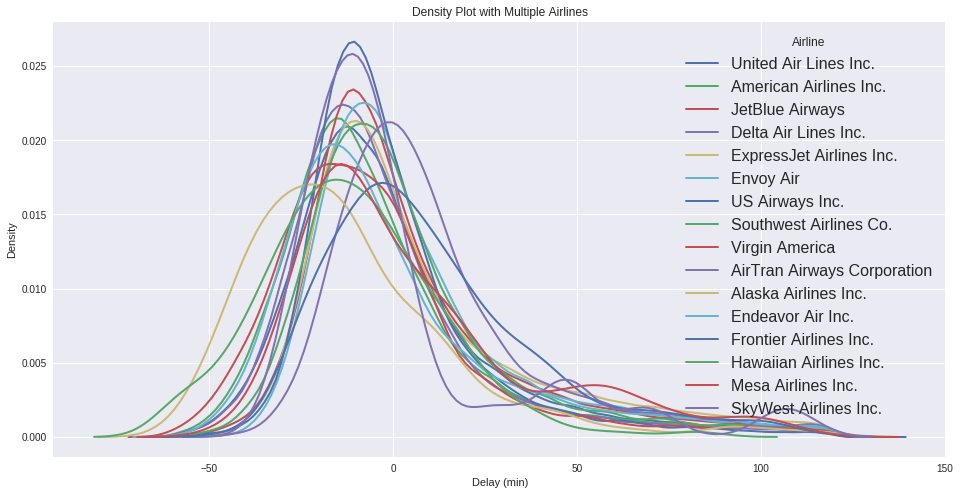

In [251]:
# Some plot parameters
sns.color_palette("Paired")
plt.figure(figsize=[16,8])

# Iterate through the all airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

In [252]:
# calculate mean of airline groups
summary = flights.groupby(['name'], as_index=False).mean()
summary.sort_values(by=['arr_delay'], inplace=True)
summary.loc[:,['name','arr_delay']].head(5) # I know this could be made easier, see below

,name,arr_delay
1,Alaska Airlines Inc.,-11.878084
8,Hawaiian Airlines Inc.,-11.608434
15,Virgin America,-5.178252
2,American Airlines Inc.,-3.985960
3,Delta Air Lines Inc.,-3.246191


['Alaska Airlines Inc.', 'Hawaiian Airlines Inc.', 'Virgin America', 'American Airlines Inc.', 'Delta Air Lines Inc.']


Text(0, 0.5, 'Density')

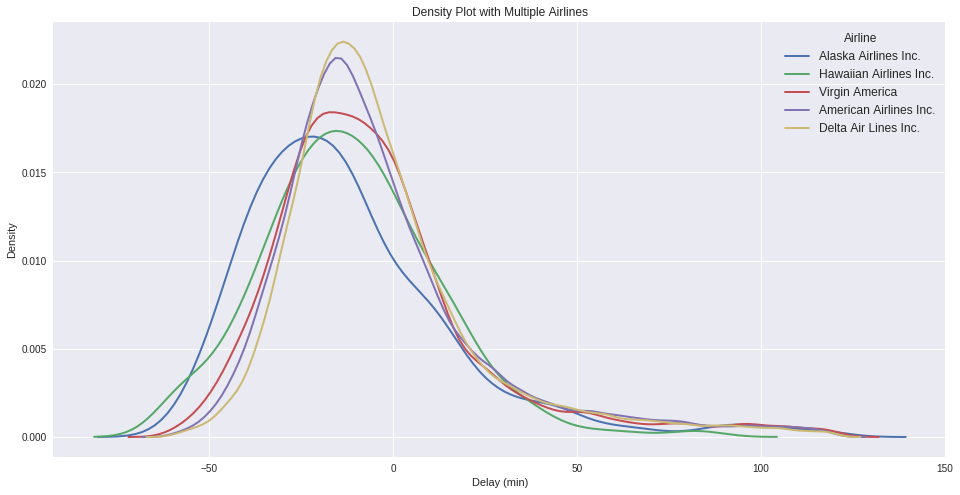

In [264]:
# create subset of top 5 airlines to plot
winners = summary['name'].tolist()
top5 = winners[:5]
print(top5)

#Again some plot settings
plt.figure(figsize=[16,8])

# Iterate through the top airlines to make the result more visible
for top5 in top5:
    # Subset to the airline
    subset = flights[flights['name'] == top5]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = top5)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Airline', loc='best')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')


**Alaska Airline wins because the integral (area under the curve) is greater below 0 (on time) than the others. Also the mean is lowest/earliest.**

In [265]:
# Alternative to calculate important statistics
flights.groupby('name')['arr_delay'].describe().sort_values(by=['mean', 'std']).head(5)

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Alaska Airlines Inc.,689.0,-11.878084,29.566533,-60.0,-31.0,-18.0,1.0,119.0
Hawaiian Airlines Inc.,332.0,-11.608434,23.604822,-60.0,-27.0,-13.0,2.0,83.0
Virgin America,4920.0,-5.178252,28.641181,-60.0,-23.0,-10.0,5.0,120.0
American Airlines Inc.,31197.0,-3.985960,28.257029,-60.0,-22.0,-10.0,6.0,120.0
Delta Air Lines Inc.,46468.0,-3.246191,26.723283,-60.0,-20.0,-9.0,6.0,120.0


# But again, Alaska Airlines wins from my perspective...

**Part 2:**

* Use the same airline data to demonstrate (or disprove) the four aspects of the Central Limit Theorem (from Central Limit Theorem video).
* Hint: take repeated random samples of a specific size and measure the mean and standard deviation of each one.
* Graph your results. Does it look like a normal distribution?
* How does sample size affect your results?

# N = 2000:

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Virgin America,43.0,-15.674419,19.748081,-59.0,-28.5,-17.0,-6.50,36.0
Hawaiian Airlines Inc.,4.0,-11.250000,17.442764,-31.0,-22.0,-11.5,-0.75,9.0
Alaska Airlines Inc.,3.0,-5.000000,37.986840,-34.0,-26.5,-19.0,9.50,38.0
Delta Air Lines Inc.,267.0,-3.842697,26.094060,-45.0,-19.0,-9.0,2.00,104.0
United Air Lines Inc.,390.0,-1.871795,28.203520,-60.0,-19.0,-7.0,9.00,118.0


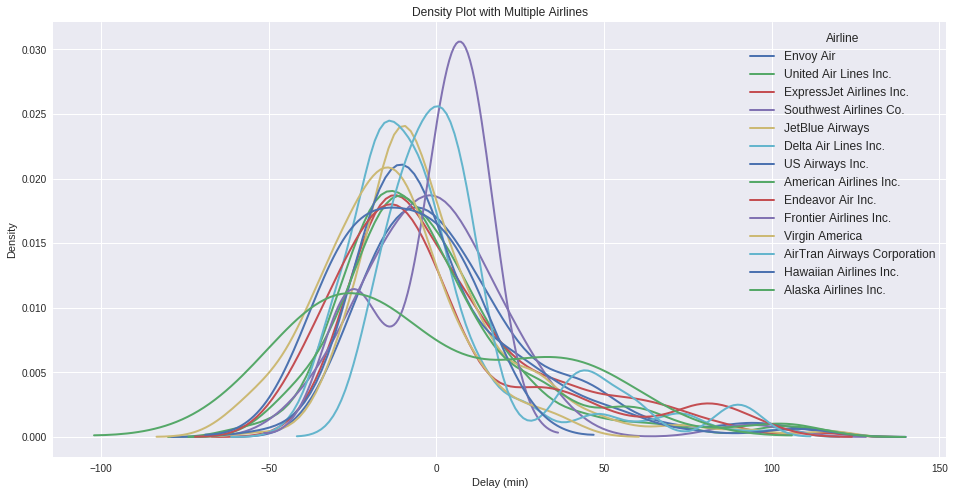

In [266]:
# pick random samples from flights dataframe and put this into new dataframe
df = flights.sample(n=2000, random_state=42)

# extract list of unique airlines from the new list
names = df.name.unique().tolist()

# plot parameters
sns.color_palette("Paired")
plt.figure(figsize=[16,8])

# Iterate through sample set of airlines
for names in names:
    # Subset to the airline
    subset = df[df['name'] == names]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = names)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Airline', loc='best')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

df.groupby('name')['arr_delay'].describe().sort_values(by=['mean', 'std']).head(5)

The ampount of samples has a big impact to the fluctuations in the plot. Only if you choose enough samples the plot becomes more similar to the original plot

# N = 5000:

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Mesa Airlines Inc.,5.0,-24.200000,17.412639,-46.0,-31.00,-24.0,-22.0,2.0
Alaska Airlines Inc.,8.0,-20.375000,25.235675,-46.0,-33.25,-25.0,-19.0,38.0
Virgin America,80.0,-12.287500,23.372706,-59.0,-27.00,-13.5,-5.0,119.0
Hawaiian Airlines Inc.,6.0,-8.833333,14.077168,-31.0,-15.75,-5.0,-2.5,9.0
Delta Air Lines Inc.,693.0,-2.526696,26.499775,-53.0,-19.00,-8.0,6.0,105.0


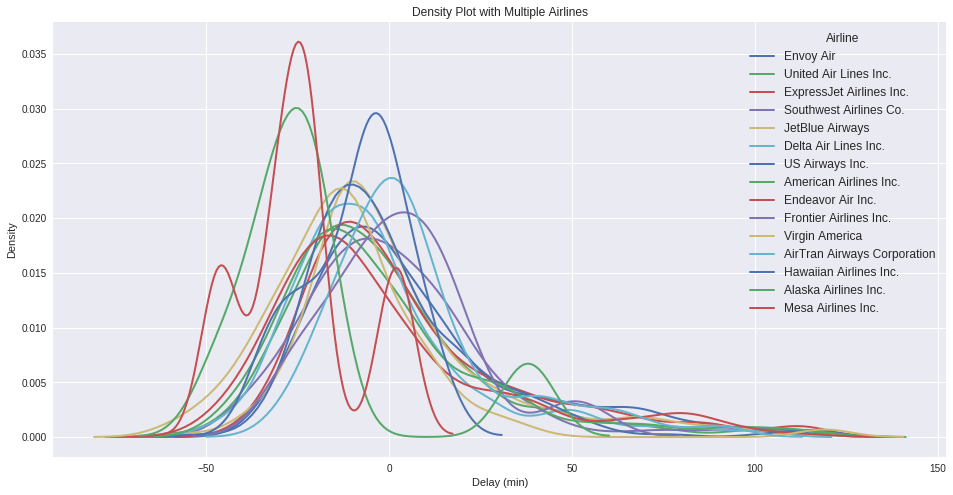

In [267]:
# pick random samples from flights dataframe and put this into new dataframe
df = flights.sample(n=5000, random_state=42)

# extract list of unique airlines from the new list
names = df.name.unique().tolist()

# plot parameters
sns.color_palette("Paired")
plt.figure(figsize=[16,8])

# Iterate through sample set of airlines
for names in names:
    # Subset to the airline
    subset = df[df['name'] == names]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = names)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Airline', loc='best')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

df.groupby('name')['arr_delay'].describe().sort_values(by=['mean', 'std']).head(5)

# N = 10000:

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Alaska Airlines Inc.,17.0,-20.000000,24.944939,-53.0,-34.00,-24.0,-14.00,38.0
Hawaiian Airlines Inc.,11.0,-12.090909,14.180653,-31.0,-24.50,-6.0,-2.50,9.0
Virgin America,152.0,-7.210526,26.944788,-59.0,-22.00,-9.0,1.25,119.0
Delta Air Lines Inc.,1404.0,-3.416667,26.166216,-54.0,-19.25,-8.0,5.25,118.0
American Airlines Inc.,979.0,-2.313585,29.069143,-51.0,-21.00,-9.0,8.00,120.0


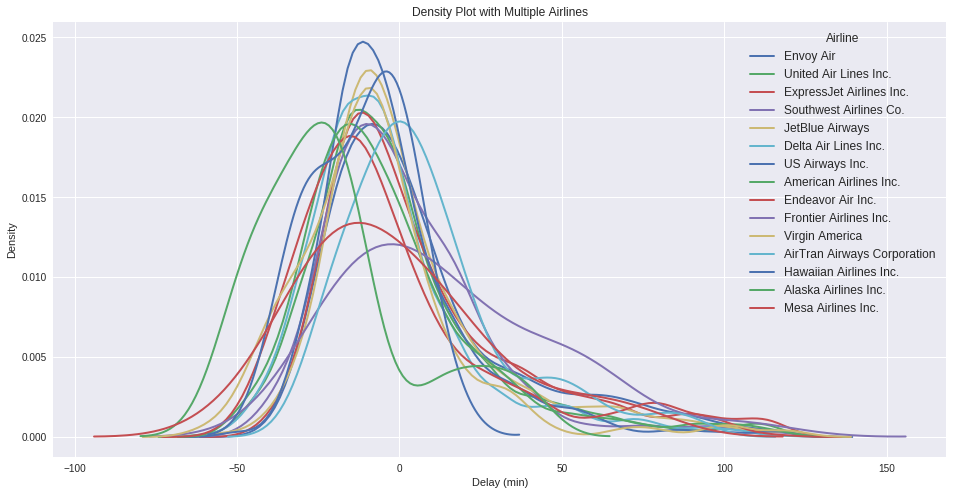

In [268]:
# pick random samples from flights dataframe and put this into new dataframe
df = flights.sample(n=10000, random_state=42)

# extract list of unique airlines from the new list
names = df.name.unique().tolist()

# plot parameters
sns.color_palette("Paired")
plt.figure(figsize=[16,8])

# Iterate through sample set of airlines
for names in names:
    # Subset to the airline
    subset = df[df['name'] == names]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = names)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Airline', loc='best')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

df.groupby('name')['arr_delay'].describe().sort_values(by=['mean', 'std']).head(5)